# Head 1st / Head 2nd / Work 1st / Work 2nd

In [1]:
import pyreadstat
import os
import gc
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

.sav ===> import pyreadstat, pyreadstat.read_sav(file_path)

.sas7bdat  ====> pandas, pd.read_sas(file_path)

.dta  ===> pd.read_stata(file_path)

In [2]:
def call_df():
    path = 'C:/Users/hml76/Desktop/Jupyter/HRD_With_MJ/HCCPII_20230828/'
    file_path = path+'2. SPSS/HCCP_2ndWave_Work_2nd.sav'

    dataframe, meta = pyreadstat.read_sav(file_path)
    columns_to_drop0 = ['W21ID2', 'W21ID3']
    dataframe = dataframe.drop(columns=columns_to_drop0)
    
    #y = df[y_name]
    #df.drop(columns=[y_name])
    gc.collect()
    return dataframe

In [3]:
def check_nan(input_dataframe):
    nan_values = input_dataframe.isna()
    nan_count_per_column = nan_values.sum()
    Nan_cols = []
    columns_with_nan = nan_count_per_column[nan_count_per_column > 0]  # Filter columns with NaN values
    print("Columns with NaN values and count of NaN values:")
    for column, count in columns_with_nan.items():
        print(f"Column '{column}' has {count} NaN value(s).")
        Nan_cols.append(column)    
        
    dataframe = input_dataframe.drop(columns=Nan_cols)
    return dataframe


def equal_distirubution(dataframe, y_lst, class_idx):
    class_counts = dataframe[y_lst[class_idx]].value_counts()
    print(class_counts)
    max_samples, min_samples = class_counts.max(), class_counts.min()
    
    balanced_df = pd.DataFrame()  # Initialize an empty DataFrame to store the balanced data
    
    for class_label, count in class_counts.items():
        if count == min_samples:      # If the class count is equal to the maximum number of samples, keep all samples
            balanced_df = pd.concat([balanced_df, dataframe[dataframe[Y[class_idx]] == class_label]])
        else:
            sampled_df = dataframe[dataframe[Y[class_idx]] == class_label].sample(min_samples, replace=True)  # Randomly sample the same number of samples from the class
            balanced_df = pd.concat([balanced_df, sampled_df])
    
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle the rows 
    y_balanced = balanced_df[Y[class_idx]]
    print(y_balanced.value_counts())
    X_balanced = balanced_df.drop(columns=Y)
    
    return X_balanced, y_balanced

In [4]:
def XGBoost(X_balanced, y_balanced, num_boost_round = 300):
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

    model = XGBClassifier(n_estimators=num_boost_round)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=False)

    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("\tAccuracy ========> ", accuracy)
    
    #plot_importance(model, max_num_features=10)
    #plt.show()
    
    return model, X_train, X_test, y_test

In [6]:
def class_one_to_five_TO_one_to_two(dataframe, y_lst, class_idx):
    dataframe_1 = dataframe[dataframe[y_lst[class_idx]] != 3]
    dataframe_1[y_lst[class_idx]] = dataframe_1[y_lst[class_idx]].map({1: 1, 2: 1, 4: 2, 5: 2})
    #dataframe_1 = dataframe_1.drop(columns=y_lst[class_idx])
    #print(dataframe_1[y_lst[class_idx]])
    return dataframe_1

In [7]:
def erase_col_for_importance(dataframe, erase_col_lst):
    dataframe = dataframe.drop(columns=erase_col_lst)
    
    return dataframe

In [8]:
scaler = MinMaxScaler()
df = call_df()
df = check_nan(df)
DF = copy.deepcopy(df)

Columns with NaN values and count of NaN values:
Column 'W21Q11A2' has 2349 NaN value(s).
Column 'W21Q11B2' has 3583 NaN value(s).
Column 'W21Q15A2' has 4487 NaN value(s).
Column 'W21Q15B2' has 3978 NaN value(s).
Column 'W21Q15C2' has 3584 NaN value(s).
Column 'W21Q15D2' has 5690 NaN value(s).
Column 'W21Q15E2' has 6613 NaN value(s).
Column 'W21Q16A2' has 6895 NaN value(s).
Column 'W21Q16B2' has 9294 NaN value(s).
Column 'W21Q16C2' has 9409 NaN value(s).
Column 'W21Q16D2' has 9456 NaN value(s).
Column 'W21Q191' has 6105 NaN value(s).
Column 'W21Q192' has 6105 NaN value(s).
Column 'W21Q31A' has 1259 NaN value(s).
Column 'W21Q31B' has 8119 NaN value(s).
Column 'W21DQ041' has 1536 NaN value(s).


# 5. 조직신뢰 

(1)직원들에게 회사 사정을 소상하게 알려준다

(2)상급자에게 의견을 자유롭게 낼 수 있다

(3)부서간의 커뮤니케이션이 잘 되는 편이다

(4)동료들 간에 서로 신뢰한다

(5)평가 및 보상이 공정하게 이루어진다

(6)경영진은 모든 면에서 믿고 따라갈 만하다

2개로 줄임: Class (1, 2) ====> 1 & (4, 5) ====> 2 & (3) ====> 삭제 

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam


def Neural_network(X_data):
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(X_data.shape[1],)))
    model.add(BatchNormalization())  
    model.add(Dense(units=128, activation='relu'))
    model.add(BatchNormalization())  
    model.add(Dense(units=32, activation='relu'))
    model.add(BatchNormalization())  
    model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification
    
    learning_rate = 0.00025  # Example learning rate

    optimizer_ = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer_, loss='binary_crossentropy', metrics=['accuracy'])

    return model
    

In [67]:
#Multi Class - 5
from sklearn.preprocessing import OneHotEncoder
Y = ['W21Q24A', 'W21Q24B', 'W21Q24C', 'W21Q24D', 'W21Q24E', 'W21Q24F']

result1 = []

for i in range(len(Y)):
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    X, y = equal_distirubution(X, Y, i)

    y=y-1

    y = np.array(y).reshape(-1,1)
    one_hot_encoder = OneHotEncoder()
    y_one_hot = one_hot_encoder.fit_transform(y)
    y_one_hot = y_one_hot.toarray()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Neural_network(X)

    R = model.fit(X, y, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=1)

    result1.append(R)

2    3563
1    2386
Name: W21Q24A, dtype: int64
2    2386
1    2386
Name: W21Q24A, dtype: int64
Epoch 1/100
19/19 [==============================] - 1s 35ms/step - loss: 0.7012 - accuracy: 0.5863 - val_loss: 3.5319 - val_accuracy: 0.5162
Epoch 2/100
19/19 [==============================] - 0s 23ms/step - loss: 0.5990 - accuracy: 0.6815 - val_loss: 1.8583 - val_accuracy: 0.5162
Epoch 3/100
19/19 [==============================] - 0s 22ms/step - loss: 0.5591 - accuracy: 0.7190 - val_loss: 1.4513 - val_accuracy: 0.5162
Epoch 4/100
19/19 [==============================] - 0s 26ms/step - loss: 0.5220 - accuracy: 0.7506 - val_loss: 1.2791 - val_accuracy: 0.5162
Epoch 5/100
19/19 [==============================] - 0s 19ms/step - loss: 0.4845 - accuracy: 0.7754 - val_loss: 1.1913 - val_accuracy: 0.5162
Epoch 6/100
19/19 [==============================] - 0s 19ms/step - loss: 0.4557 - accuracy: 0.7990 - val_loss: 1.1668 - val_accuracy: 0.5162
Epoch 7/100
19/19 [==============================] -

Epoch 58/100
19/19 [==============================] - 0s 20ms/step - loss: 0.2782 - accuracy: 0.8852 - val_loss: 2.6210 - val_accuracy: 0.4890
Epoch 59/100
19/19 [==============================] - 0s 20ms/step - loss: 0.2713 - accuracy: 0.8933 - val_loss: 1.5917 - val_accuracy: 0.5948
Epoch 60/100
19/19 [==============================] - 0s 19ms/step - loss: 0.2666 - accuracy: 0.8959 - val_loss: 0.9364 - val_accuracy: 0.6764
Epoch 61/100
19/19 [==============================] - 0s 26ms/step - loss: 0.2674 - accuracy: 0.8931 - val_loss: 1.1053 - val_accuracy: 0.6335
Epoch 62/100
19/19 [==============================] - 1s 27ms/step - loss: 0.2706 - accuracy: 0.8870 - val_loss: 1.6756 - val_accuracy: 0.5445
Epoch 63/100
19/19 [==============================] - 0s 25ms/step - loss: 0.2666 - accuracy: 0.8919 - val_loss: 1.3569 - val_accuracy: 0.6084
Epoch 64/100
19/19 [==============================] - 0s 23ms/step - loss: 0.2668 - accuracy: 0.8873 - val_loss: 1.2474 - val_accuracy: 0.6702

Epoch 15/100
14/14 [==============================] - 0s 26ms/step - loss: 0.3585 - accuracy: 0.8494 - val_loss: 1.0940 - val_accuracy: 0.5211
Epoch 16/100
14/14 [==============================] - 0s 24ms/step - loss: 0.3527 - accuracy: 0.8491 - val_loss: 1.2914 - val_accuracy: 0.5167
Epoch 17/100
14/14 [==============================] - 0s 21ms/step - loss: 0.3489 - accuracy: 0.8511 - val_loss: 1.4716 - val_accuracy: 0.5167
Epoch 18/100
14/14 [==============================] - 0s 19ms/step - loss: 0.3442 - accuracy: 0.8543 - val_loss: 1.7520 - val_accuracy: 0.5167
Epoch 19/100
14/14 [==============================] - 0s 19ms/step - loss: 0.3402 - accuracy: 0.8558 - val_loss: 1.9001 - val_accuracy: 0.5167
Epoch 20/100
14/14 [==============================] - 0s 24ms/step - loss: 0.3352 - accuracy: 0.8613 - val_loss: 1.9880 - val_accuracy: 0.5167
Epoch 21/100
14/14 [==============================] - 0s 21ms/step - loss: 0.3333 - accuracy: 0.8584 - val_loss: 2.4719 - val_accuracy: 0.5167

14/14 [==============================] - 0s 24ms/step - loss: 0.2072 - accuracy: 0.9149 - val_loss: 2.9957 - val_accuracy: 0.5197
Epoch 73/100
14/14 [==============================] - 0s 23ms/step - loss: 0.1984 - accuracy: 0.9216 - val_loss: 2.3492 - val_accuracy: 0.5255
Epoch 74/100
14/14 [==============================] - 0s 23ms/step - loss: 0.2013 - accuracy: 0.9199 - val_loss: 2.9220 - val_accuracy: 0.5197
Epoch 75/100
14/14 [==============================] - 0s 26ms/step - loss: 0.2047 - accuracy: 0.9205 - val_loss: 2.6905 - val_accuracy: 0.5939
Epoch 76/100
14/14 [==============================] - 0s 25ms/step - loss: 0.2010 - accuracy: 0.9219 - val_loss: 3.0725 - val_accuracy: 0.5706
Epoch 77/100
14/14 [==============================] - 0s 21ms/step - loss: 0.1986 - accuracy: 0.9190 - val_loss: 3.7704 - val_accuracy: 0.5866
Epoch 78/100
14/14 [==============================] - 0s 21ms/step - loss: 0.1898 - accuracy: 0.9272 - val_loss: 3.2039 - val_accuracy: 0.5837
Epoch 79/100

Epoch 29/100
14/14 [==============================] - 0s 20ms/step - loss: 0.3075 - accuracy: 0.8673 - val_loss: 4.2006 - val_accuracy: 0.4943
Epoch 30/100
14/14 [==============================] - 0s 21ms/step - loss: 0.2976 - accuracy: 0.8696 - val_loss: 0.8805 - val_accuracy: 0.6232
Epoch 31/100
14/14 [==============================] - 0s 20ms/step - loss: 0.2988 - accuracy: 0.8693 - val_loss: 3.2534 - val_accuracy: 0.5014
Epoch 32/100
14/14 [==============================] - 0s 22ms/step - loss: 0.2930 - accuracy: 0.8696 - val_loss: 3.0589 - val_accuracy: 0.4986
Epoch 33/100
14/14 [==============================] - 0s 21ms/step - loss: 0.2918 - accuracy: 0.8750 - val_loss: 4.9414 - val_accuracy: 0.4943
Epoch 34/100
14/14 [==============================] - 0s 21ms/step - loss: 0.2961 - accuracy: 0.8716 - val_loss: 4.4478 - val_accuracy: 0.4943
Epoch 35/100
14/14 [==============================] - 0s 20ms/step - loss: 0.2931 - accuracy: 0.8684 - val_loss: 4.8546 - val_accuracy: 0.4928

14/14 [==============================] - 0s 22ms/step - loss: 0.1970 - accuracy: 0.9257 - val_loss: 1.1339 - val_accuracy: 0.6590
Epoch 87/100
14/14 [==============================] - 0s 22ms/step - loss: 0.1862 - accuracy: 0.9323 - val_loss: 0.8533 - val_accuracy: 0.6848
Epoch 88/100
14/14 [==============================] - 0s 20ms/step - loss: 0.1828 - accuracy: 0.9292 - val_loss: 1.8771 - val_accuracy: 0.5831
Epoch 89/100
14/14 [==============================] - 0s 20ms/step - loss: 0.1868 - accuracy: 0.9249 - val_loss: 2.2387 - val_accuracy: 0.5860
Epoch 90/100
14/14 [==============================] - 0s 22ms/step - loss: 0.1970 - accuracy: 0.9200 - val_loss: 3.7415 - val_accuracy: 0.5516
Epoch 91/100
14/14 [==============================] - 0s 22ms/step - loss: 0.1803 - accuracy: 0.9335 - val_loss: 3.7496 - val_accuracy: 0.5301
Epoch 92/100
14/14 [==============================] - 0s 24ms/step - loss: 0.1808 - accuracy: 0.9295 - val_loss: 2.2159 - val_accuracy: 0.5845
Epoch 93/100

8/8 [==============================] - 0s 28ms/step - loss: 0.2244 - accuracy: 0.9157 - val_loss: 2.1918 - val_accuracy: 0.5248
Epoch 44/100
8/8 [==============================] - 0s 24ms/step - loss: 0.2307 - accuracy: 0.9097 - val_loss: 2.0457 - val_accuracy: 0.5248
Epoch 45/100
8/8 [==============================] - 0s 22ms/step - loss: 0.2257 - accuracy: 0.9117 - val_loss: 2.1192 - val_accuracy: 0.5248
Epoch 46/100
8/8 [==============================] - 0s 24ms/step - loss: 0.2284 - accuracy: 0.9028 - val_loss: 2.3261 - val_accuracy: 0.5248
Epoch 47/100
8/8 [==============================] - 0s 22ms/step - loss: 0.2273 - accuracy: 0.9142 - val_loss: 2.2079 - val_accuracy: 0.5248
Epoch 48/100
8/8 [==============================] - 0s 25ms/step - loss: 0.2208 - accuracy: 0.9112 - val_loss: 1.8320 - val_accuracy: 0.5396
Epoch 49/100
8/8 [==============================] - 0s 23ms/step - loss: 0.2212 - accuracy: 0.9152 - val_loss: 1.5508 - val_accuracy: 0.5421
Epoch 50/100
8/8 [========

1    2301
2    2301
Name: W21Q24E, dtype: int64
Epoch 1/100
18/18 [==============================] - 1s 30ms/step - loss: 0.6430 - accuracy: 0.6506 - val_loss: 1.2701 - val_accuracy: 0.5016
Epoch 2/100
18/18 [==============================] - 0s 21ms/step - loss: 0.5118 - accuracy: 0.7714 - val_loss: 0.8748 - val_accuracy: 0.5049
Epoch 3/100
18/18 [==============================] - 0s 21ms/step - loss: 0.4420 - accuracy: 0.8066 - val_loss: 0.8145 - val_accuracy: 0.5081
Epoch 4/100
18/18 [==============================] - 0s 21ms/step - loss: 0.3816 - accuracy: 0.8401 - val_loss: 0.7794 - val_accuracy: 0.5081
Epoch 5/100
18/18 [==============================] - 0s 20ms/step - loss: 0.3486 - accuracy: 0.8605 - val_loss: 0.7978 - val_accuracy: 0.5288
Epoch 6/100
18/18 [==============================] - 0s 20ms/step - loss: 0.3220 - accuracy: 0.8653 - val_loss: 0.8147 - val_accuracy: 0.5440
Epoch 7/100
18/18 [==============================] - 0s 23ms/step - loss: 0.2999 - accuracy: 0.8798 

18/18 [==============================] - 0s 20ms/step - loss: 0.1572 - accuracy: 0.9396 - val_loss: 1.6392 - val_accuracy: 0.5635
Epoch 59/100
18/18 [==============================] - 0s 22ms/step - loss: 0.1568 - accuracy: 0.9411 - val_loss: 3.1454 - val_accuracy: 0.4973
Epoch 60/100
18/18 [==============================] - 0s 23ms/step - loss: 0.1541 - accuracy: 0.9405 - val_loss: 3.1560 - val_accuracy: 0.4919
Epoch 61/100
18/18 [==============================] - 0s 21ms/step - loss: 0.1515 - accuracy: 0.9409 - val_loss: 3.9345 - val_accuracy: 0.4962
Epoch 62/100
18/18 [==============================] - 0s 21ms/step - loss: 0.1466 - accuracy: 0.9429 - val_loss: 3.3394 - val_accuracy: 0.4929
Epoch 63/100
18/18 [==============================] - 0s 21ms/step - loss: 0.1635 - accuracy: 0.9350 - val_loss: 5.0259 - val_accuracy: 0.4832
Epoch 64/100
18/18 [==============================] - 0s 22ms/step - loss: 0.1575 - accuracy: 0.9365 - val_loss: 0.9058 - val_accuracy: 0.7362
Epoch 65/100

Epoch 15/100
14/14 [==============================] - 0s 23ms/step - loss: 0.2084 - accuracy: 0.9149 - val_loss: 1.3294 - val_accuracy: 0.5050
Epoch 16/100
14/14 [==============================] - 0s 23ms/step - loss: 0.1970 - accuracy: 0.9220 - val_loss: 1.3223 - val_accuracy: 0.5164
Epoch 17/100
14/14 [==============================] - 0s 21ms/step - loss: 0.1925 - accuracy: 0.9246 - val_loss: 1.1596 - val_accuracy: 0.5135
Epoch 18/100
14/14 [==============================] - 0s 22ms/step - loss: 0.1896 - accuracy: 0.9217 - val_loss: 1.2750 - val_accuracy: 0.5220
Epoch 19/100
14/14 [==============================] - 0s 21ms/step - loss: 0.1804 - accuracy: 0.9257 - val_loss: 1.1145 - val_accuracy: 0.5263
Epoch 20/100
14/14 [==============================] - 0s 21ms/step - loss: 0.1771 - accuracy: 0.9283 - val_loss: 0.9934 - val_accuracy: 0.5405
Epoch 21/100
14/14 [==============================] - 0s 22ms/step - loss: 0.1718 - accuracy: 0.9340 - val_loss: 1.2517 - val_accuracy: 0.5249

14/14 [==============================] - 0s 23ms/step - loss: 0.0996 - accuracy: 0.9582 - val_loss: 7.0616 - val_accuracy: 0.5036
Epoch 73/100
14/14 [==============================] - 0s 21ms/step - loss: 0.0901 - accuracy: 0.9661 - val_loss: 5.1363 - val_accuracy: 0.5036
Epoch 74/100
14/14 [==============================] - 0s 21ms/step - loss: 0.0819 - accuracy: 0.9735 - val_loss: 9.2618 - val_accuracy: 0.5036
Epoch 75/100
14/14 [==============================] - 0s 25ms/step - loss: 0.0782 - accuracy: 0.9732 - val_loss: 6.7460 - val_accuracy: 0.5036
Epoch 76/100
14/14 [==============================] - 0s 24ms/step - loss: 0.0840 - accuracy: 0.9698 - val_loss: 6.2585 - val_accuracy: 0.5036
Epoch 77/100
14/14 [==============================] - 0s 22ms/step - loss: 0.0904 - accuracy: 0.9641 - val_loss: 1.0209 - val_accuracy: 0.7112
Epoch 78/100
14/14 [==============================] - 0s 23ms/step - loss: 0.0776 - accuracy: 0.9755 - val_loss: 1.3787 - val_accuracy: 0.6686
Epoch 79/100

# 6. 직무만족 

(1)현재 하고 있는 일의 내용에 만족한다

(2)현재 받고 있는 임금에 만족한다

(3)현재 직장의 인간관계에 만족한다

하고 있는 일에 대한 전반적 만족도

In [66]:
#Multi Class - 5
from sklearn.preprocessing import OneHotEncoder
Y = ['W21Q26A', 'W21Q26B', 'W21Q26C', 'W21Q261']

result2 = []

for i in range(len(Y)):
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    X, y = equal_distirubution(X, Y, i)

    y=y-1

    y = np.array(y).reshape(-1,1)
    one_hot_encoder = OneHotEncoder()
    y_one_hot = one_hot_encoder.fit_transform(y)
    y_one_hot = y_one_hot.toarray()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Neural_network(X)

    R = model.fit(X, y, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=1)

    result2.append(R)

2    5484
1     835
Name: W21Q26A, dtype: int64
1    835
2    835
Name: W21Q26A, dtype: int64
Epoch 1/100
7/7 [==============================] - 1s 43ms/step - loss: 0.7572 - accuracy: 0.5617 - val_loss: 23.8865 - val_accuracy: 0.5240
Epoch 2/100
7/7 [==============================] - 0s 22ms/step - loss: 0.6143 - accuracy: 0.6635 - val_loss: 20.8688 - val_accuracy: 0.5240
Epoch 3/100
7/7 [==============================] - 0s 23ms/step - loss: 0.5775 - accuracy: 0.7000 - val_loss: 19.6021 - val_accuracy: 0.5240
Epoch 4/100
7/7 [==============================] - 0s 25ms/step - loss: 0.5474 - accuracy: 0.7329 - val_loss: 17.8713 - val_accuracy: 0.5240
Epoch 5/100
7/7 [==============================] - 0s 24ms/step - loss: 0.5347 - accuracy: 0.7389 - val_loss: 15.9173 - val_accuracy: 0.5240
Epoch 6/100
7/7 [==============================] - 0s 32ms/step - loss: 0.5182 - accuracy: 0.7461 - val_loss: 13.9187 - val_accuracy: 0.5240
Epoch 7/100
7/7 [==============================] - 0s 27ms/s

7/7 [==============================] - 0s 28ms/step - loss: 0.2447 - accuracy: 0.9096 - val_loss: 1.1499 - val_accuracy: 0.5928
Epoch 59/100
7/7 [==============================] - 0s 28ms/step - loss: 0.2500 - accuracy: 0.9090 - val_loss: 2.6888 - val_accuracy: 0.4820
Epoch 60/100
7/7 [==============================] - 0s 28ms/step - loss: 0.2351 - accuracy: 0.9120 - val_loss: 1.2325 - val_accuracy: 0.5838
Epoch 61/100
7/7 [==============================] - 0s 23ms/step - loss: 0.2434 - accuracy: 0.9120 - val_loss: 3.1392 - val_accuracy: 0.4760
Epoch 62/100
7/7 [==============================] - 0s 25ms/step - loss: 0.2361 - accuracy: 0.9084 - val_loss: 2.8799 - val_accuracy: 0.4790
Epoch 63/100
7/7 [==============================] - 0s 25ms/step - loss: 0.2320 - accuracy: 0.9108 - val_loss: 2.5824 - val_accuracy: 0.4850
Epoch 64/100
7/7 [==============================] - 0s 24ms/step - loss: 0.2326 - accuracy: 0.9192 - val_loss: 2.4406 - val_accuracy: 0.4880
Epoch 65/100
7/7 [========

19/19 [==============================] - 0s 21ms/step - loss: 0.4153 - accuracy: 0.8154 - val_loss: 0.9475 - val_accuracy: 0.5222
Epoch 16/100
19/19 [==============================] - 0s 23ms/step - loss: 0.4072 - accuracy: 0.8209 - val_loss: 0.5780 - val_accuracy: 0.6907
Epoch 17/100
19/19 [==============================] - 0s 20ms/step - loss: 0.4025 - accuracy: 0.8201 - val_loss: 1.5835 - val_accuracy: 0.5138
Epoch 18/100
19/19 [==============================] - 0s 19ms/step - loss: 0.3969 - accuracy: 0.8275 - val_loss: 3.1246 - val_accuracy: 0.5117
Epoch 19/100
19/19 [==============================] - 0s 20ms/step - loss: 0.3977 - accuracy: 0.8245 - val_loss: 3.8587 - val_accuracy: 0.5117
Epoch 20/100
19/19 [==============================] - 0s 24ms/step - loss: 0.3896 - accuracy: 0.8279 - val_loss: 4.4585 - val_accuracy: 0.5117
Epoch 21/100
19/19 [==============================] - 0s 22ms/step - loss: 0.3959 - accuracy: 0.8292 - val_loss: 2.9672 - val_accuracy: 0.5117
Epoch 22/100

19/19 [==============================] - 0s 20ms/step - loss: 0.2774 - accuracy: 0.8902 - val_loss: 2.4877 - val_accuracy: 0.5212
Epoch 73/100
19/19 [==============================] - 0s 22ms/step - loss: 0.2750 - accuracy: 0.8891 - val_loss: 3.9300 - val_accuracy: 0.4915
Epoch 74/100
19/19 [==============================] - 0s 19ms/step - loss: 0.2729 - accuracy: 0.8906 - val_loss: 2.7305 - val_accuracy: 0.5445
Epoch 75/100
19/19 [==============================] - 0s 23ms/step - loss: 0.2679 - accuracy: 0.8972 - val_loss: 0.9749 - val_accuracy: 0.6780
Epoch 76/100
19/19 [==============================] - 0s 24ms/step - loss: 0.2665 - accuracy: 0.8932 - val_loss: 2.0802 - val_accuracy: 0.5318
Epoch 77/100
19/19 [==============================] - 0s 19ms/step - loss: 0.2645 - accuracy: 0.8993 - val_loss: 2.8683 - val_accuracy: 0.5106
Epoch 78/100
19/19 [==============================] - 0s 20ms/step - loss: 0.2644 - accuracy: 0.8938 - val_loss: 6.6586 - val_accuracy: 0.4883
Epoch 79/100

5/5 [==============================] - 0s 25ms/step - loss: 0.4064 - accuracy: 0.8096 - val_loss: 5.5948 - val_accuracy: 0.4939
Epoch 30/100
5/5 [==============================] - 0s 25ms/step - loss: 0.4039 - accuracy: 0.8217 - val_loss: 5.2325 - val_accuracy: 0.4939
Epoch 31/100
5/5 [==============================] - 0s 25ms/step - loss: 0.3927 - accuracy: 0.8306 - val_loss: 5.0879 - val_accuracy: 0.4939
Epoch 32/100
5/5 [==============================] - 0s 28ms/step - loss: 0.3846 - accuracy: 0.8250 - val_loss: 4.7495 - val_accuracy: 0.4939
Epoch 33/100
5/5 [==============================] - 0s 29ms/step - loss: 0.3817 - accuracy: 0.8314 - val_loss: 4.6442 - val_accuracy: 0.4939
Epoch 34/100
5/5 [==============================] - 0s 34ms/step - loss: 0.3822 - accuracy: 0.8274 - val_loss: 4.4071 - val_accuracy: 0.4939
Epoch 35/100
5/5 [==============================] - 0s 35ms/step - loss: 0.3739 - accuracy: 0.8395 - val_loss: 4.1942 - val_accuracy: 0.4939
Epoch 36/100
5/5 [========

5/5 [==============================] - 0s 32ms/step - loss: 0.1944 - accuracy: 0.9384 - val_loss: 3.6969 - val_accuracy: 0.5061
Epoch 88/100
5/5 [==============================] - 0s 27ms/step - loss: 0.1884 - accuracy: 0.9384 - val_loss: 3.3233 - val_accuracy: 0.5101
Epoch 89/100
5/5 [==============================] - 0s 30ms/step - loss: 0.1882 - accuracy: 0.9360 - val_loss: 2.8124 - val_accuracy: 0.5344
Epoch 90/100
5/5 [==============================] - 0s 31ms/step - loss: 0.1926 - accuracy: 0.9360 - val_loss: 2.9832 - val_accuracy: 0.5142
Epoch 91/100
5/5 [==============================] - 0s 24ms/step - loss: 0.1882 - accuracy: 0.9319 - val_loss: 1.9040 - val_accuracy: 0.6032
Epoch 92/100
5/5 [==============================] - 0s 25ms/step - loss: 0.1772 - accuracy: 0.9384 - val_loss: 1.6136 - val_accuracy: 0.6194
Epoch 93/100
5/5 [==============================] - 0s 29ms/step - loss: 0.1844 - accuracy: 0.9368 - val_loss: 1.5694 - val_accuracy: 0.6194
Epoch 94/100
5/5 [========

7/7 [==============================] - 0s 27ms/step - loss: 0.2086 - accuracy: 0.9187 - val_loss: 1.7815 - val_accuracy: 0.5016
Epoch 45/100
7/7 [==============================] - 0s 36ms/step - loss: 0.1951 - accuracy: 0.9269 - val_loss: 0.8802 - val_accuracy: 0.5524
Epoch 46/100
7/7 [==============================] - 0s 38ms/step - loss: 0.1951 - accuracy: 0.9295 - val_loss: 0.7276 - val_accuracy: 0.6413
Epoch 47/100
7/7 [==============================] - 0s 25ms/step - loss: 0.1930 - accuracy: 0.9263 - val_loss: 0.9259 - val_accuracy: 0.5492
Epoch 48/100
7/7 [==============================] - 0s 32ms/step - loss: 0.1814 - accuracy: 0.9307 - val_loss: 1.0276 - val_accuracy: 0.5270
Epoch 49/100
7/7 [==============================] - 0s 31ms/step - loss: 0.1824 - accuracy: 0.9288 - val_loss: 0.8878 - val_accuracy: 0.5619
Epoch 50/100
7/7 [==============================] - 0s 25ms/step - loss: 0.1778 - accuracy: 0.9352 - val_loss: 0.9449 - val_accuracy: 0.5333
Epoch 51/100
7/7 [========

# 7. 조직몰입 

(1) 나는 조금이라도 좋은 조건을 제시하는 회사가 있으면 옮길 것을 고려해 보고 있다

(2) 나는 이 회사의 문제를 내 문제처럼 느낀다

(3) 만약 내가 이 회사를 떠나기로 결정한다면 내 인생의 너무 많은 것을 잃게 될 것이다

(4) 이 회사는 내가 충성할 만한 가치가 있다

In [65]:
#Multi Class - 5
from sklearn.preprocessing import OneHotEncoder
Y = ['W21Q27A', 'W21Q27B', 'W21Q27C', 'W21Q27D']

result3 = []

for i in range(len(Y)):
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    X, y = equal_distirubution(X, Y, i)

    y=y-1

    y = np.array(y).reshape(-1,1)
    one_hot_encoder = OneHotEncoder()
    y_one_hot = one_hot_encoder.fit_transform(y)
    y_one_hot = y_one_hot.toarray()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Neural_network(X)

    R = model.fit(X, y, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=1)

    result3.append(R)

2    3684
1    2354
Name: W21Q27A, dtype: int64
2    2354
1    2354
Name: W21Q27A, dtype: int64
Epoch 1/100
19/19 [==============================] - 1s 31ms/step - loss: 0.7223 - accuracy: 0.5087 - val_loss: 1.9985 - val_accuracy: 0.4989
Epoch 2/100
19/19 [==============================] - 0s 21ms/step - loss: 0.6726 - accuracy: 0.5928 - val_loss: 0.8619 - val_accuracy: 0.4979
Epoch 3/100
19/19 [==============================] - 0s 22ms/step - loss: 0.6325 - accuracy: 0.6563 - val_loss: 0.7486 - val_accuracy: 0.5085
Epoch 4/100
19/19 [==============================] - 0s 22ms/step - loss: 0.5997 - accuracy: 0.6844 - val_loss: 1.1708 - val_accuracy: 0.5011
Epoch 5/100
19/19 [==============================] - 0s 20ms/step - loss: 0.5811 - accuracy: 0.7075 - val_loss: 1.5738 - val_accuracy: 0.5011
Epoch 6/100
19/19 [==============================] - 0s 21ms/step - loss: 0.5717 - accuracy: 0.7062 - val_loss: 1.6798 - val_accuracy: 0.5011
Epoch 7/100
19/19 [==============================] -

Epoch 58/100
19/19 [==============================] - 0s 19ms/step - loss: 0.3433 - accuracy: 0.8511 - val_loss: 1.2396 - val_accuracy: 0.5637
Epoch 59/100
19/19 [==============================] - 0s 21ms/step - loss: 0.3477 - accuracy: 0.8511 - val_loss: 1.5868 - val_accuracy: 0.5775
Epoch 60/100
19/19 [==============================] - 0s 25ms/step - loss: 0.3476 - accuracy: 0.8511 - val_loss: 1.6830 - val_accuracy: 0.5361
Epoch 61/100
19/19 [==============================] - 0s 21ms/step - loss: 0.3395 - accuracy: 0.8539 - val_loss: 1.7481 - val_accuracy: 0.5212
Epoch 62/100
19/19 [==============================] - 0s 23ms/step - loss: 0.3410 - accuracy: 0.8509 - val_loss: 5.4506 - val_accuracy: 0.4989
Epoch 63/100
19/19 [==============================] - 0s 20ms/step - loss: 0.3310 - accuracy: 0.8554 - val_loss: 2.3734 - val_accuracy: 0.5191
Epoch 64/100
19/19 [==============================] - 0s 22ms/step - loss: 0.3286 - accuracy: 0.8600 - val_loss: 2.3208 - val_accuracy: 0.5435

Epoch 15/100
10/10 [==============================] - 0s 22ms/step - loss: 0.4654 - accuracy: 0.7889 - val_loss: 0.9592 - val_accuracy: 0.5173
Epoch 16/100
10/10 [==============================] - 0s 23ms/step - loss: 0.4632 - accuracy: 0.7795 - val_loss: 0.9267 - val_accuracy: 0.5051
Epoch 17/100
10/10 [==============================] - 0s 24ms/step - loss: 0.4587 - accuracy: 0.7901 - val_loss: 0.9350 - val_accuracy: 0.5071
Epoch 18/100
10/10 [==============================] - 0s 25ms/step - loss: 0.4563 - accuracy: 0.7914 - val_loss: 0.8983 - val_accuracy: 0.5092
Epoch 19/100
10/10 [==============================] - 0s 23ms/step - loss: 0.4516 - accuracy: 0.7901 - val_loss: 0.9018 - val_accuracy: 0.5132
Epoch 20/100
10/10 [==============================] - 0s 23ms/step - loss: 0.4479 - accuracy: 0.7897 - val_loss: 0.8432 - val_accuracy: 0.5031
Epoch 21/100
10/10 [==============================] - 0s 22ms/step - loss: 0.4470 - accuracy: 0.7926 - val_loss: 0.8456 - val_accuracy: 0.5132

10/10 [==============================] - 1s 74ms/step - loss: 0.3103 - accuracy: 0.8712 - val_loss: 3.3049 - val_accuracy: 0.5356
Epoch 73/100
10/10 [==============================] - 0s 29ms/step - loss: 0.3105 - accuracy: 0.8627 - val_loss: 2.1961 - val_accuracy: 0.5418
Epoch 74/100
10/10 [==============================] - 1s 72ms/step - loss: 0.3012 - accuracy: 0.8745 - val_loss: 1.7492 - val_accuracy: 0.5418
Epoch 75/100
10/10 [==============================] - 1s 81ms/step - loss: 0.2946 - accuracy: 0.8802 - val_loss: 1.6286 - val_accuracy: 0.5438
Epoch 76/100
10/10 [==============================] - 1s 57ms/step - loss: 0.3042 - accuracy: 0.8639 - val_loss: 2.9773 - val_accuracy: 0.5397
Epoch 77/100
10/10 [==============================] - 0s 46ms/step - loss: 0.2982 - accuracy: 0.8765 - val_loss: 2.5955 - val_accuracy: 0.5438
Epoch 78/100
10/10 [==============================] - 0s 51ms/step - loss: 0.2949 - accuracy: 0.8835 - val_loss: 2.5832 - val_accuracy: 0.5377
Epoch 79/100

Epoch 29/100
19/19 [==============================] - 0s 20ms/step - loss: 0.4249 - accuracy: 0.8016 - val_loss: 5.0754 - val_accuracy: 0.5041
Epoch 30/100
19/19 [==============================] - 0s 20ms/step - loss: 0.4240 - accuracy: 0.8084 - val_loss: 3.7035 - val_accuracy: 0.5041
Epoch 31/100
19/19 [==============================] - 0s 21ms/step - loss: 0.4278 - accuracy: 0.7960 - val_loss: 3.4539 - val_accuracy: 0.5041
Epoch 32/100
19/19 [==============================] - 0s 21ms/step - loss: 0.4237 - accuracy: 0.8036 - val_loss: 1.9564 - val_accuracy: 0.5072
Epoch 33/100
19/19 [==============================] - 0s 23ms/step - loss: 0.4220 - accuracy: 0.8041 - val_loss: 1.3198 - val_accuracy: 0.5134
Epoch 34/100
19/19 [==============================] - 0s 22ms/step - loss: 0.4126 - accuracy: 0.8076 - val_loss: 1.6484 - val_accuracy: 0.5103
Epoch 35/100
19/19 [==============================] - 0s 21ms/step - loss: 0.4133 - accuracy: 0.8111 - val_loss: 2.2763 - val_accuracy: 0.5052

19/19 [==============================] - 0s 23ms/step - loss: 0.2759 - accuracy: 0.8865 - val_loss: 2.1451 - val_accuracy: 0.5640
Epoch 87/100
19/19 [==============================] - 0s 22ms/step - loss: 0.2715 - accuracy: 0.8952 - val_loss: 3.1624 - val_accuracy: 0.5134
Epoch 88/100
19/19 [==============================] - 0s 22ms/step - loss: 0.2708 - accuracy: 0.8973 - val_loss: 8.9751 - val_accuracy: 0.5041
Epoch 89/100
19/19 [==============================] - 0s 25ms/step - loss: 0.2633 - accuracy: 0.8933 - val_loss: 5.6478 - val_accuracy: 0.5041
Epoch 90/100
19/19 [==============================] - 0s 22ms/step - loss: 0.2585 - accuracy: 0.9004 - val_loss: 3.3273 - val_accuracy: 0.5124
Epoch 91/100
19/19 [==============================] - 0s 23ms/step - loss: 0.2615 - accuracy: 0.9014 - val_loss: 2.9859 - val_accuracy: 0.5733
Epoch 92/100
19/19 [==============================] - 0s 24ms/step - loss: 0.2519 - accuracy: 0.9031 - val_loss: 1.5096 - val_accuracy: 0.6302
Epoch 93/100

Epoch 43/100
14/14 [==============================] - 0s 22ms/step - loss: 0.2742 - accuracy: 0.8951 - val_loss: 9.0998 - val_accuracy: 0.5374
Epoch 44/100
14/14 [==============================] - 0s 23ms/step - loss: 0.2737 - accuracy: 0.8925 - val_loss: 8.3214 - val_accuracy: 0.5374
Epoch 45/100
14/14 [==============================] - 0s 23ms/step - loss: 0.2761 - accuracy: 0.8960 - val_loss: 5.8518 - val_accuracy: 0.5374
Epoch 46/100
14/14 [==============================] - 0s 22ms/step - loss: 0.2830 - accuracy: 0.8904 - val_loss: 7.7849 - val_accuracy: 0.5374
Epoch 47/100
14/14 [==============================] - 0s 23ms/step - loss: 0.2710 - accuracy: 0.8922 - val_loss: 7.5185 - val_accuracy: 0.5374
Epoch 48/100
14/14 [==============================] - 0s 27ms/step - loss: 0.2691 - accuracy: 0.8945 - val_loss: 4.2413 - val_accuracy: 0.5374
Epoch 49/100
14/14 [==============================] - 0s 22ms/step - loss: 0.2693 - accuracy: 0.8939 - val_loss: 3.1492 - val_accuracy: 0.5374

14/14 [==============================] - 0s 27ms/step - loss: 0.2435 - accuracy: 0.9056 - val_loss: 8.6348 - val_accuracy: 0.4626


# 8. 번아웃 

(6) 나는 현재 업무로 인해 무력감이나 피곤함을 느낄 때가 많아졌다

In [64]:
#Multi Class - 5
from sklearn.preprocessing import OneHotEncoder
Y = ['W21Q27F']

result4 = []

for i in range(len(Y)):
    X = class_one_to_five_TO_one_to_two(df, Y, i)
    X, y = equal_distirubution(X, Y, i)

    y=y-1

    y = np.array(y).reshape(-1,1)
    one_hot_encoder = OneHotEncoder()
    y_one_hot = one_hot_encoder.fit_transform(y)
    y_one_hot = y_one_hot.toarray()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Neural_network(X)

    R = model.fit(X, y, validation_data=(X_test, y_test), epochs=100, batch_size=256, verbose=1)

result4 = R

2    3159
1    2329
Name: W21Q27F, dtype: int64
2    2329
1    2329
Name: W21Q27F, dtype: int64
Epoch 1/100
19/19 [==============================] - 1s 33ms/step - loss: 0.6886 - accuracy: 0.5629 - val_loss: 4.3792 - val_accuracy: 0.4861
Epoch 2/100
19/19 [==============================] - 0s 23ms/step - loss: 0.6547 - accuracy: 0.6088 - val_loss: 2.2320 - val_accuracy: 0.4861
Epoch 3/100
19/19 [==============================] - 0s 25ms/step - loss: 0.6405 - accuracy: 0.6241 - val_loss: 1.6615 - val_accuracy: 0.4861
Epoch 4/100
19/19 [==============================] - 0s 25ms/step - loss: 0.6285 - accuracy: 0.6410 - val_loss: 1.4730 - val_accuracy: 0.4861
Epoch 5/100
19/19 [==============================] - 0s 25ms/step - loss: 0.6172 - accuracy: 0.6526 - val_loss: 1.3271 - val_accuracy: 0.4861
Epoch 6/100
19/19 [==============================] - 0s 23ms/step - loss: 0.6009 - accuracy: 0.6730 - val_loss: 1.0713 - val_accuracy: 0.4785
Epoch 7/100
19/19 [==============================] -

Epoch 58/100
19/19 [==============================] - 0s 23ms/step - loss: 0.3327 - accuracy: 0.8547 - val_loss: 0.5805 - val_accuracy: 0.7854
Epoch 59/100
19/19 [==============================] - 0s 21ms/step - loss: 0.3278 - accuracy: 0.8562 - val_loss: 4.4464 - val_accuracy: 0.4861
Epoch 60/100
19/19 [==============================] - 0s 25ms/step - loss: 0.3131 - accuracy: 0.8667 - val_loss: 3.7240 - val_accuracy: 0.5161
Epoch 61/100
19/19 [==============================] - 0s 23ms/step - loss: 0.3119 - accuracy: 0.8637 - val_loss: 3.8800 - val_accuracy: 0.5150
Epoch 62/100
19/19 [==============================] - 0s 21ms/step - loss: 0.3062 - accuracy: 0.8699 - val_loss: 4.8938 - val_accuracy: 0.4861
Epoch 63/100
19/19 [==============================] - 0s 20ms/step - loss: 0.3010 - accuracy: 0.8766 - val_loss: 7.9819 - val_accuracy: 0.4861
Epoch 64/100
19/19 [==============================] - 0s 23ms/step - loss: 0.2951 - accuracy: 0.8763 - val_loss: 6.3622 - val_accuracy: 0.4861

In [68]:
pd.DataFrame(result[0].history)

,loss,accuracy,val_loss,val_accuracy
0,0.680614,0.598748,5.595660,0.503556
1,0.548540,0.735060,4.377020,0.503556
2,0.471592,0.780592,3.557990,0.503556
3,0.403254,0.830108,3.021525,0.503556
4,0.354808,0.849744,3.137176,0.503556
...,...,...,...,...
95,0.101841,0.960159,3.971727,0.504979
96,0.087477,0.966705,5.295363,0.512091
97,0.084568,0.970973,4.929403,0.503556
98,0.081749,0.969550,4.991989,0.529161


In [72]:
len(result3)

4

In [70]:
for i in range(1,5):
    for j in range(len(globals()['result{}'.format(i)])):
        data = globals()['result{}'.format(i)][j].history
        pd.DataFrame(data).to_csv('./DNN_result/QT{}_{}.csv'.format(i, j), index=False)

TypeError: object of type 'History' has no len()

In [108]:
names = [['W21Q24A', 'W21Q24B', 'W21Q24C', 'W21Q24D', 'W21Q24E', 'W21Q24F'],
        ['W21Q26A', 'W21Q26B', 'W21Q26C', 'W21Q261'],
        ['W21Q27A', 'W21Q27B', 'W21Q27C', 'W21Q27D'],
        ['W21Q27F']]

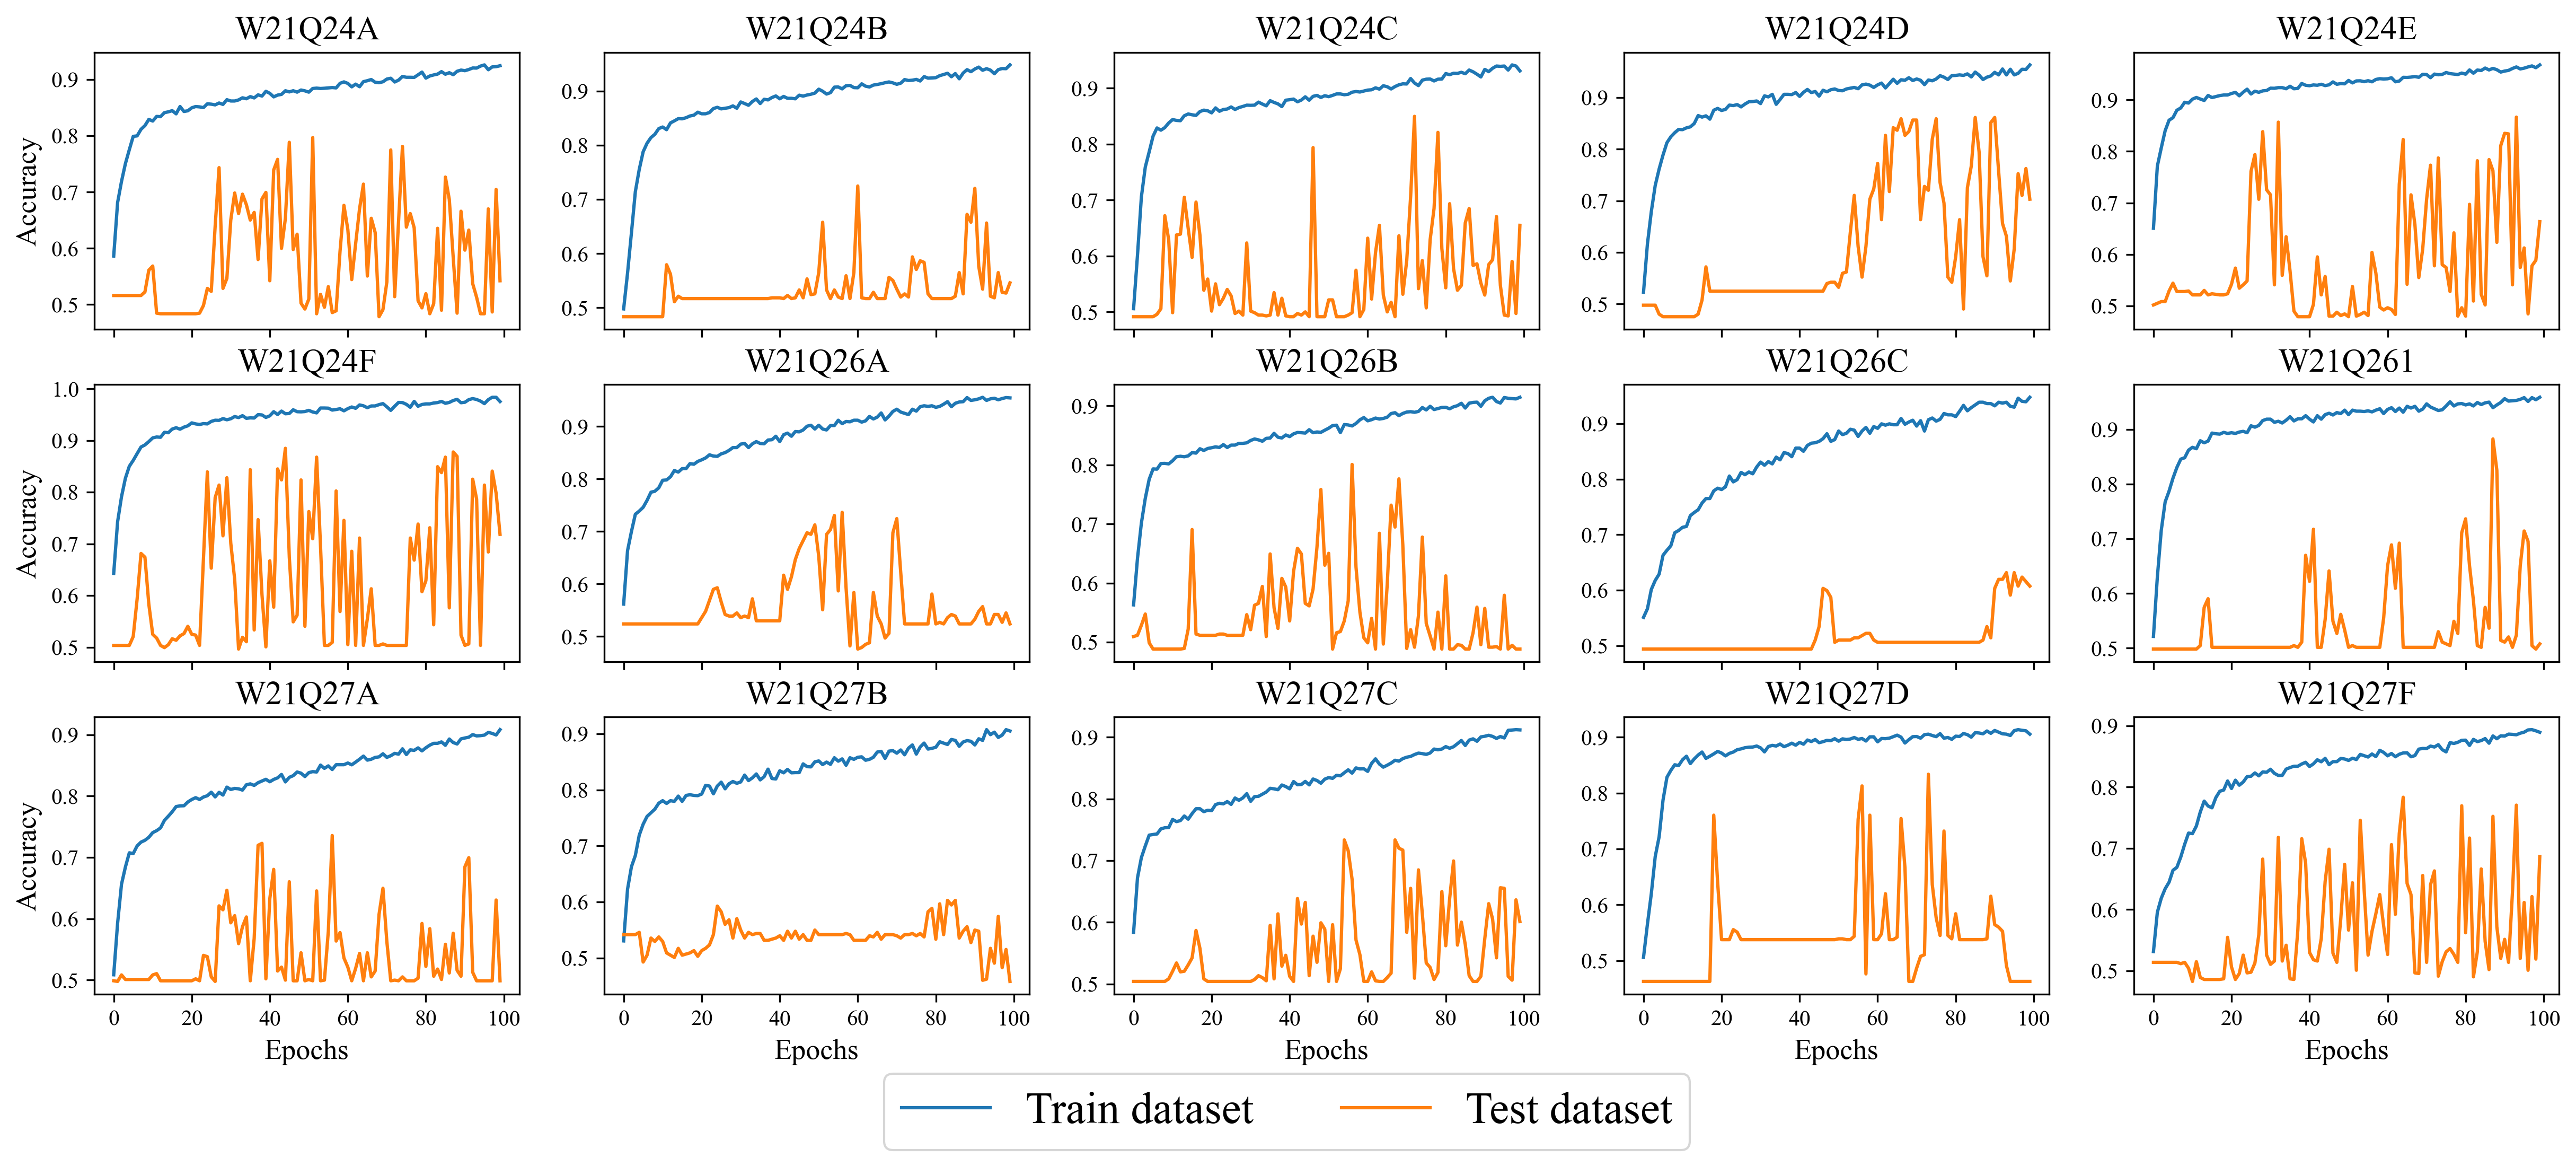

In [131]:
lst = [6,4,4,1]
cnt_1, cnt_2 = 0, 0

plt.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots(3, 5, figsize=(20, 8), sharex=True, dpi=300)

for i in range(4):
    for j in range(lst[i]):
        data = pd.read_csv('./DNN_result/QT{}_{}.csv'.format(i+1, j))
        ax[cnt_2, cnt_1].plot(data['accuracy'], label='Train dataset')  
        ax[cnt_2, cnt_1].plot(data['val_accuracy'], label='Test dataset')  
        ax[cnt_2, cnt_1].set_title(f'{names[i][j]}', fontsize=15)
        
        
        if cnt_1 == 0:
            ax[cnt_2, cnt_1].set_ylabel('Accuracy', fontsize=13)
        
        if cnt_2 == 2:
            ax[cnt_2, cnt_1].set_xlabel('Epochs', fontsize=13)
        
        cnt_1 = cnt_1+1
        
        if cnt_1 == 5:
            cnt_1 = 0
            cnt_2 = cnt_2 + 1
        
handles, labels = ax[0, 0].get_legend_handles_labels()  # Get legend handles and labels from one subplot
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), ncol=4, fontsize=20)

#plt.tight_layout()
plt.subplots_adjust(bottom=0.14)  # Increase bottom margin to make space for legend

plt.show()

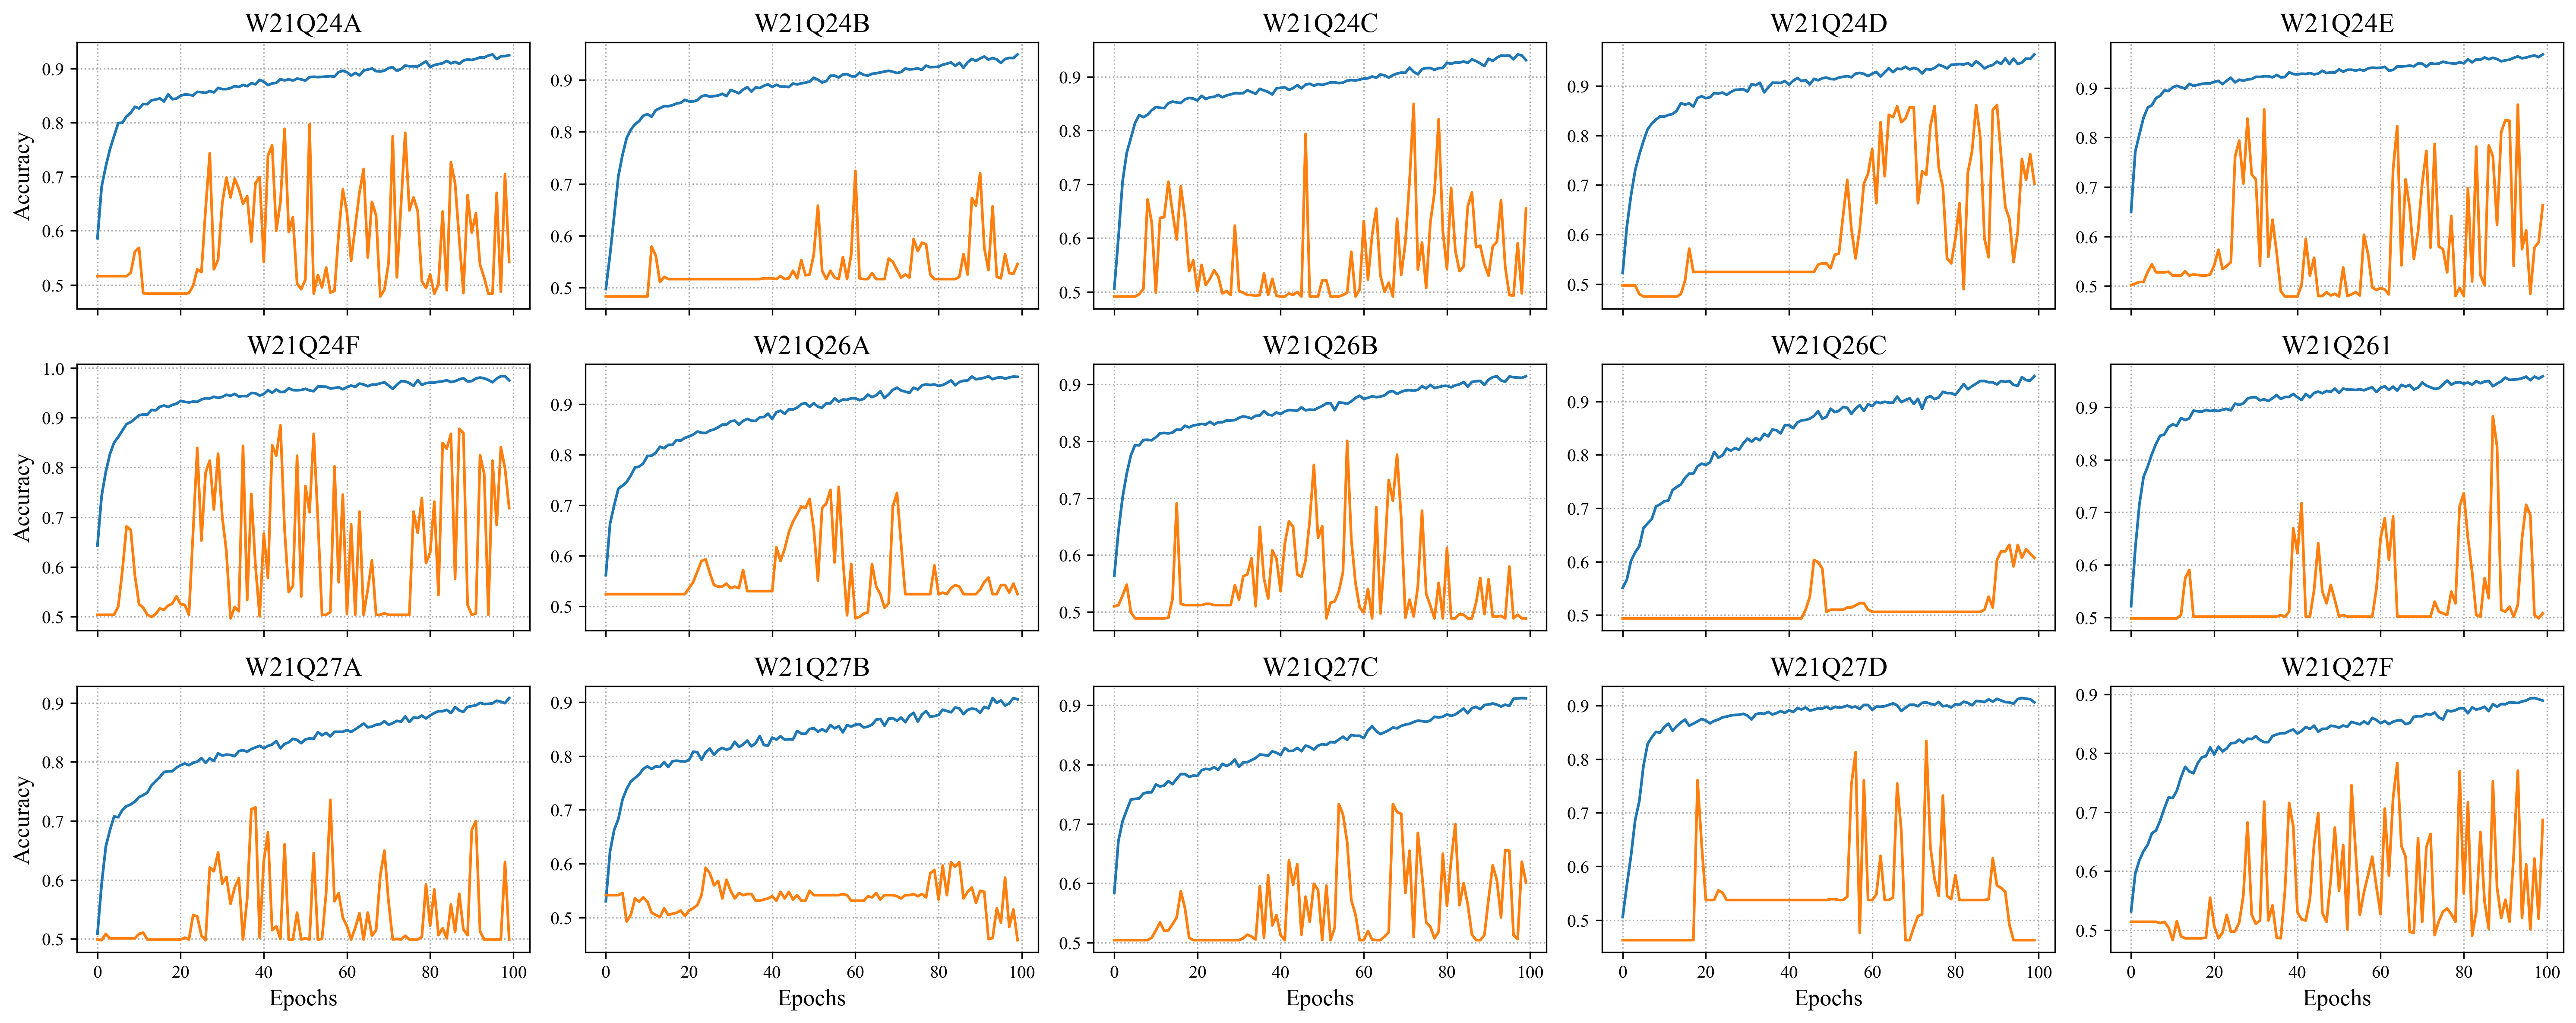

In [122]:
lst = [6,4,4,1]
cnt_1, cnt_2 = 0, 0

plt.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots(3, 5, figsize=(20, 8), sharex=True, dpi=300)

for i in range(4):
    for j in range(lst[i]):
        data = pd.read_csv('./DNN_result/QT{}_{}.csv'.format(i+1, j))
        ax[cnt_2, cnt_1].plot(data['accuracy'])  
        ax[cnt_2, cnt_1].plot(data['val_accuracy'])  
        ax[cnt_2, cnt_1].set_title(f'{names[i][j]}', fontsize=15)
        ax[cnt_2, cnt_1].grid(True, linestyle='dotted')
        
        if cnt_1 == 0:
            ax[cnt_2, cnt_1].set_ylabel('Accuracy', fontsize=13)
        
        if cnt_2 == 2:
            ax[cnt_2, cnt_1].set_xlabel('Epochs', fontsize=13)
        
        cnt_1 = cnt_1+1
        
        if cnt_1 == 5:
            cnt_1 = 0
            cnt_2 = cnt_2 + 1
        
plt.tight_layout()
plt.show()